# Experiment 2.4

Goal:</br>
HPO of Transformer on ftS load, pred_len=336, find good lr, bs for each ms </br>

Result: </br>
Choice of batch size is unclear. Among the best performing models, the batch size is >32 --> Set it to 64, learning rate needs to be >= 0.0001.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%pwd

'/Users/timw/Documents/University/thesis_2/scripts/Exp2.4_HPO_batch_size_h336_ED'

In [2]:
#%%python3 -u create_hpo_tables.py --exp_name "Exp2.4"

## Import data and plot all benchmark results

In [3]:
hpo_table = pd.read_csv("./../../results/hpo_table_Exp2.4_metrics.csv", index_col=0)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
0,0.00001,32,2,1,32,0.196891,0.348949,18,12,0.0,431
1,0.00001,32,2,1,128,0.102348,0.240554,13,9,0.7,837
2,0.00001,32,2,1,512,0.078661,0.205633,12,14,10.5,1640
3,0.00001,32,4,3,128,0.090913,0.224901,13,19,1.6,2030
4,0.00001,64,2,1,32,0.246688,0.393878,17,7,0.0,716
5,0.00001,64,2,1,128,0.132702,0.281287,16,9,0.7,1510
6,0.00001,64,2,1,512,0.085408,0.215072,12,13,10.5,3110
7,0.00001,64,4,3,128,0.113132,0.256924,21,25,1.6,3881
8,0.00001,128,2,1,32,0.341372,0.469191,17,6,0.0,1359
9,0.00001,128,2,1,128,0.195141,0.350392,16,7,0.7,2868


In [4]:
hpo_table.sum(axis=0)

learning_rate         0.019320
batch_size         3584.000000
e_layers            120.000000
d_layers             72.000000
d_model            9600.000000
MSE                   4.731573
MAE                  11.135533
Epochs              457.000000
Time[min]           348.000000
Params[Mio.]        153.600000
Max_mem[MB]      128161.000000
dtype: float64

In [5]:
hpo_table.groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,
32,0.000403,2.5,1.5,200.0,0.090638,0.224365,7.8750,7.1875,3.2,1234.5000
64,0.000403,2.5,1.5,200.0,0.094828,0.227834,9.5000,7.3125,3.2,2304.0625
128,0.000403,2.5,1.5,200.0,0.110258,0.243772,11.1875,7.2500,3.2,4471.5000


In [6]:
hpo_table[hpo_table["MSE"]<0.08].groupby("batch_size").mean()

,learning_rate,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
batch_size,,,,,,,,,,
32,0.000414,2.750000,1.750000,320.000000,0.073692,0.201507,6.250000,6.875000,5.937500,1685.875000
64,0.000383,3.000000,2.000000,192.000000,0.069817,0.195873,7.333333,6.833333,2.783333,2962.000000
128,0.000529,2.857143,1.857143,237.714286,0.071447,0.198950,7.714286,6.714286,3.885714,5808.142857


In [7]:
sorted_df = hpo_table.sort_values(by="MSE")
sorted_df

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
15,0.00010,32,4,3,128,0.066683,0.189690,6,8,1.6,2030
35,0.00050,128,4,3,128,0.067296,0.194059,7,7,1.6,7603
47,0.00100,128,4,3,128,0.067675,0.191747,7,7,1.6,7603
31,0.00050,64,4,3,128,0.067905,0.193210,5,6,1.6,3881
29,0.00050,64,2,1,128,0.068178,0.193978,5,2,0.7,1510
33,0.00050,128,2,1,128,0.068801,0.195567,7,3,0.7,2868
34,0.00050,128,2,1,512,0.069222,0.193474,5,4,10.5,6056
19,0.00010,64,4,3,128,0.069286,0.194096,13,15,1.6,3881
43,0.00100,64,4,3,128,0.069318,0.195446,5,6,1.6,3881
18,0.00010,64,2,1,512,0.069417,0.196301,7,7,10.5,3109


In [8]:
best_mse = sorted_df.iloc[0]["MSE"]
best_mse

0.0666827484965324

## Learning rate vs MSE

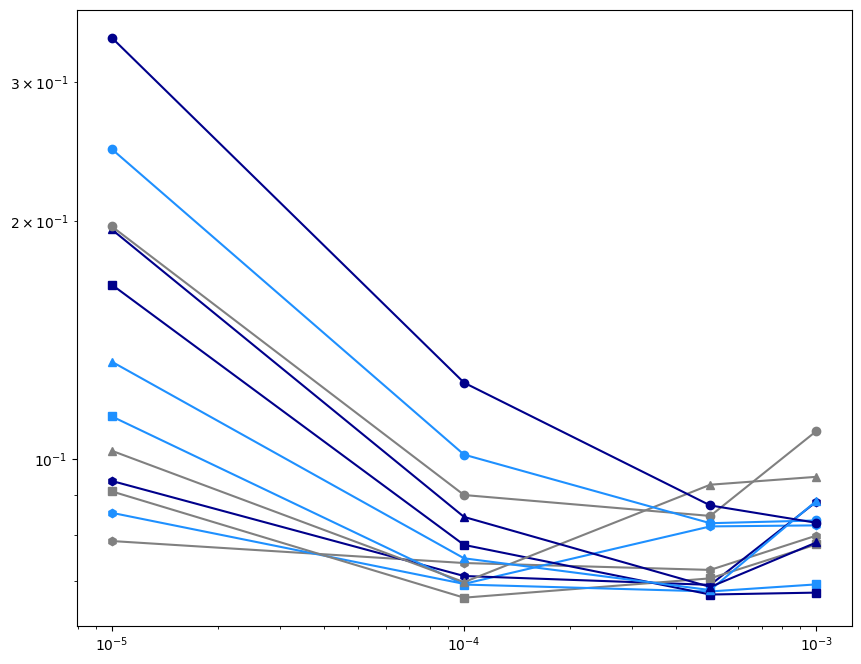

In [9]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.0: 'o', 0.7: '^', 1.6: 's', 10.5: 'h'}
batch_sizes = [32, 64, 128]
model_sizes = [10.5, 1.6, 0.7, 0.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for ms in model_sizes:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["Params[Mio.]"] == ms)]
        ax.plot(hpo_table_subset["learning_rate"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[ms])

ax.set_xscale("log")
ax.set_yscale("log")



## Params[Mio.] vs MSE

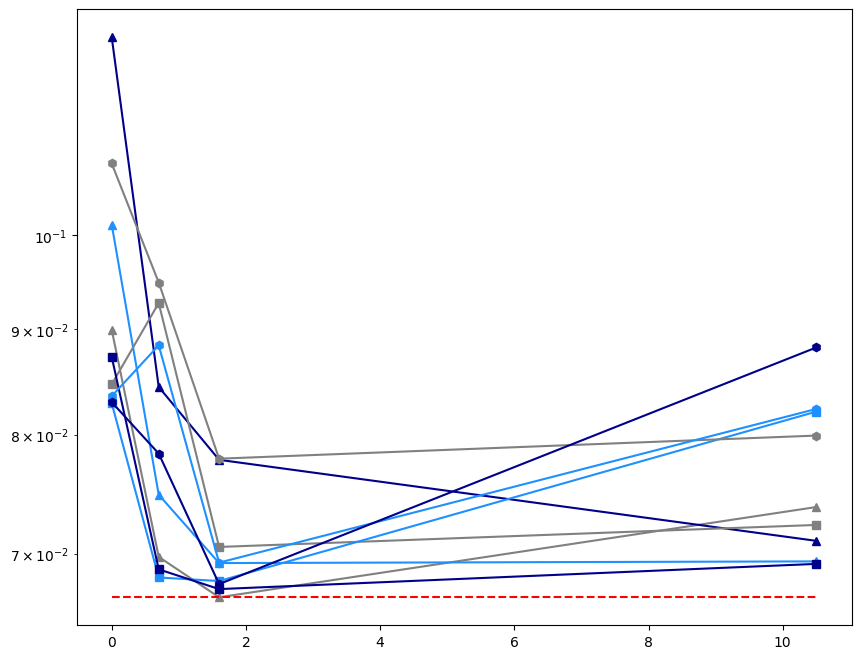

In [10]:
colors = {32: "grey", 64: "dodgerblue", 128: "darkblue"}
markers = {0.00001: 'o', 0.0001: '^', 0.0005: 's', 0.001: 'h'}
batch_sizes = [32, 64, 128]
#model_sizes = [10.5, 1.6, 0.7, 0.0]
learning_rates = [0.0001, 0.0005, 0.001]

hpo_table.sort_values(by="Params[Mio.]", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for lr in learning_rates:
    for bs in batch_sizes:
        hpo_table_subset = hpo_table[(hpo_table["batch_size"] == bs) & (hpo_table["learning_rate"] == lr)]
        #print(hpo_table_subset)
        ax.plot(hpo_table_subset["Params[Mio.]"], hpo_table_subset["MSE"], color=colors[bs], marker=markers[lr])

ax.set_yscale("log")
ax.hlines(best_mse, 0,10.5, color="red", linestyles="--")
#ax.set_ylim(0.02, 0.08)



In [11]:
hpo_table.sort_values(by=["Params[Mio.]","MSE"], inplace=True)
hpo_table

,learning_rate,batch_size,e_layers,d_layers,d_model,MSE,MAE,Epochs,Time[min],Params[Mio.],Max_mem[MB]
28,0.00050,64,2,1,32,0.082856,0.213906,9,4,0.0,716
44,0.00100,128,2,1,32,0.082960,0.214241,13,4,0.0,1359
40,0.00100,64,2,1,32,0.083524,0.217508,6,2,0.0,716
24,0.00050,32,2,1,32,0.084634,0.219175,6,4,0.0,431
32,0.00050,128,2,1,32,0.087263,0.219658,12,4,0.0,1359
12,0.00010,32,2,1,32,0.089954,0.223536,12,8,0.0,431
16,0.00010,64,2,1,32,0.101197,0.239535,13,5,0.0,716
36,0.00100,32,2,1,32,0.108377,0.255418,5,3,0.0,431
20,0.00010,128,2,1,32,0.124824,0.270092,17,5,0.0,1359
0,0.00001,32,2,1,32,0.196891,0.348949,18,12,0.0,431


In [12]:
reduced_hpo_table = hpo_table[["learning_rate", "batch_size", "Params[Mio.]", "MSE"]]
print(reduced_hpo_table.shape)

(48, 4)


# Various parallel coordinate plot

In [13]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.colors import Normalize
import numpy as np


def parallel_coordinates(data, column_names, threshold=None, ynames=None):
    fig, host = plt.subplots(figsize=(10, 6))

    if threshold is not None:
        data = data[data["MSE"] < threshold]
    
    if ynames is None:
        ynames = column_names
    else:
        ynames = ynames

    data = data[column_names]
    ys = data.to_numpy()
    N = ys.shape[0]

    print(ys.shape)

    ymins = ys.min(axis=0)
    ymaxs = ys.max(axis=0)
    dys = ymaxs - ymins
    ymins -= dys * 0.05  # add 5% padding below and above
    ymaxs += dys * 0.05
    dys = ymaxs - ymins

    # transform all data to be compatible with the main axis
    zs = np.zeros_like(ys)
    zs[:, 0] = ys[:, 0]
    zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

    # Add small horizontal jitter
    jitter_strength = 0.00001  # Adjust this value based on your data range
    jitter = np.random.normal(0, jitter_strength, zs.shape)
    jitter[:, -1] = 0  # Don't jitter the last column

    zs += jitter


    axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax != host:
            ax.spines['left'].set_visible(False)
            ax.yaxis.set_ticks_position('right')
            ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))
            #ax.set_yscale('log')


    axes[-1].set_yscale('log')

    #axes[-2].set_yscale('log')
    #axes[-3].set_yscale('log')

    host.set_xlim(0, ys.shape[1] - 1)
    host.set_xticks(range(ys.shape[1]))
    host.set_xticklabels(ynames, fontsize=14)
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title('Parallel Coordinates Plot', fontsize=18)

    # Use a colormap and normalize based on the last column of ys
    color_norm = Normalize(vmin=ys[:, -1].min(), vmax=ys[:, -1].max())
    cmap = plt.get_cmap('viridis')

    for j in range(N):
        color = cmap(color_norm(ys[j, -1]))
        verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)], np.repeat(zs[j, :], 3)[1:-1]))
        codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=color)
        host.add_patch(patch)

    plt.tight_layout()
    plt.show()


(48, 4)


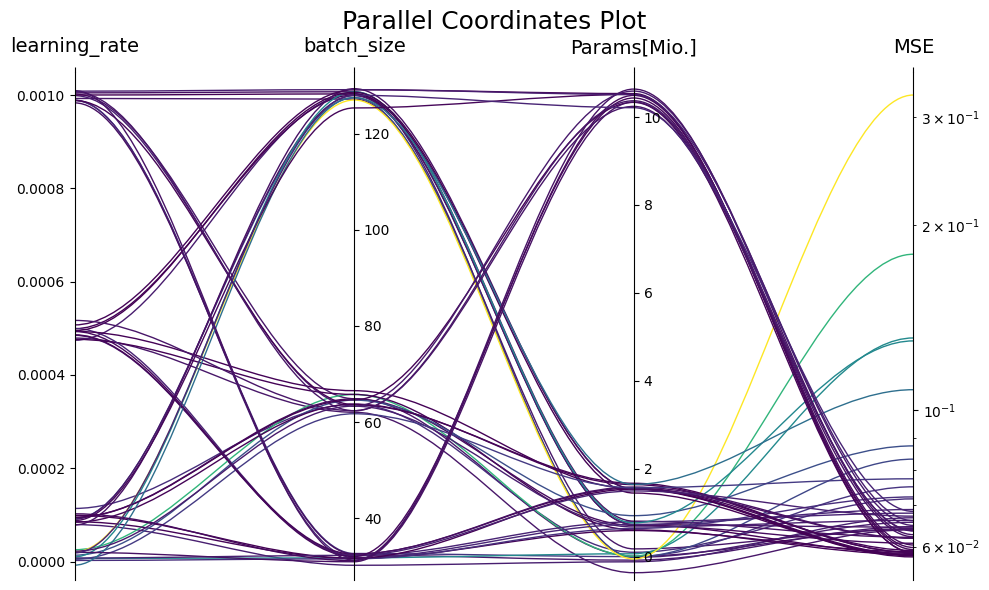

In [14]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"])

(37, 4)


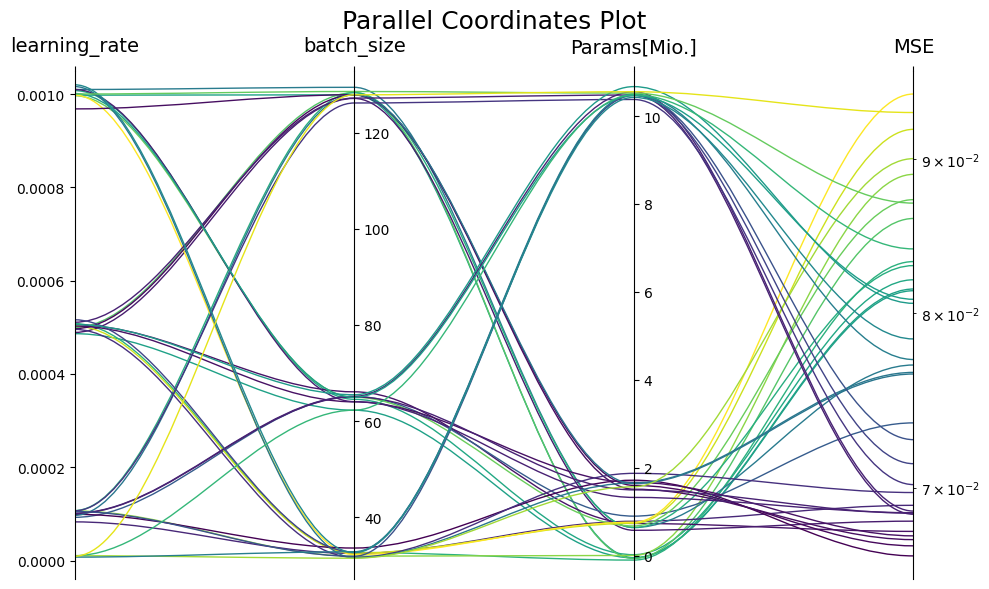

(11, 4)


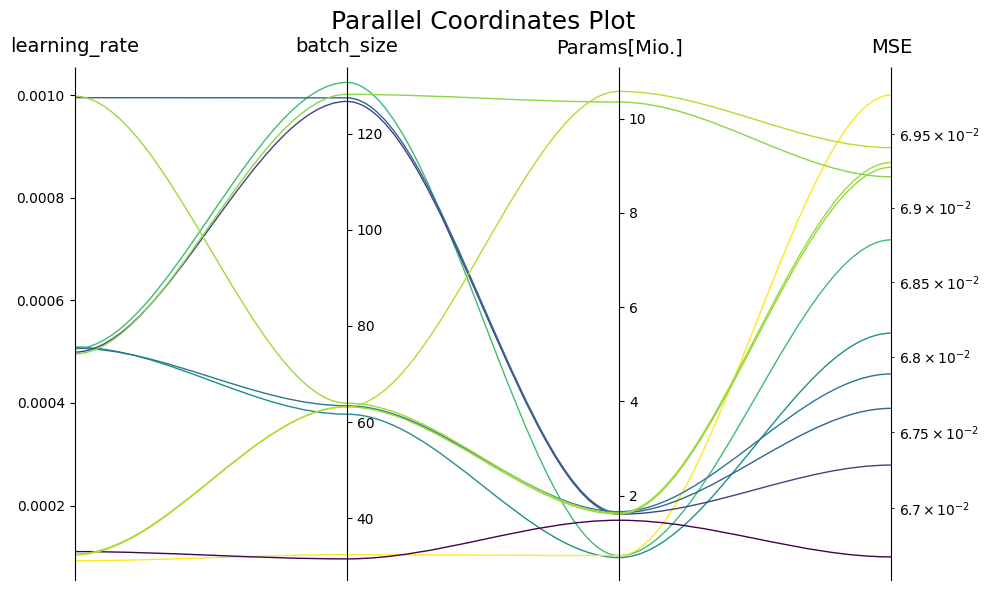

In [15]:
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"], threshold=0.1)
parallel_coordinates(reduced_hpo_table, ["learning_rate", "batch_size", "Params[Mio.]", "MSE"], threshold=0.07)

(12, 3)


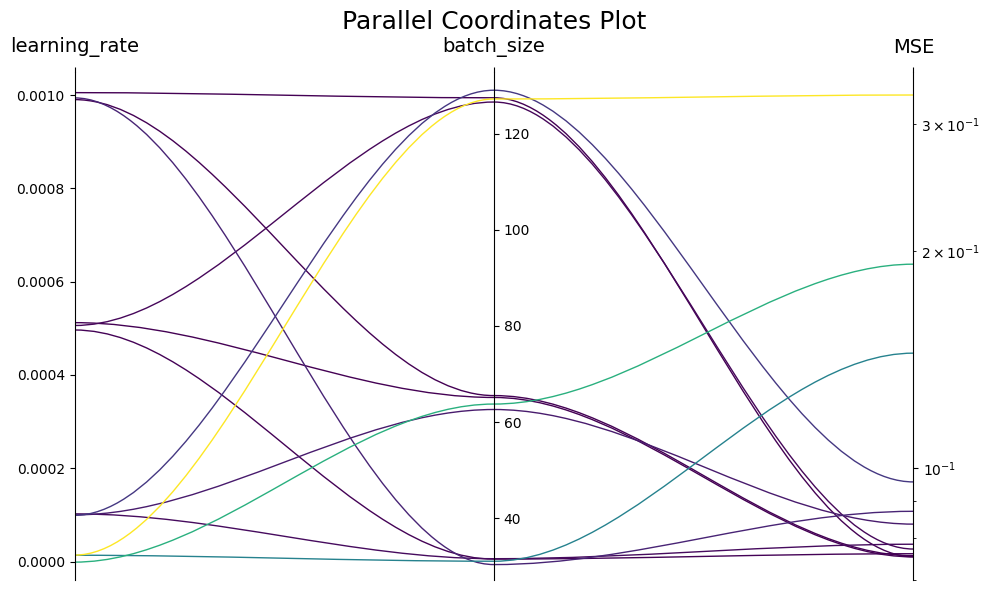

In [16]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.0], ["learning_rate", "batch_size", "MSE"])


(12, 3)


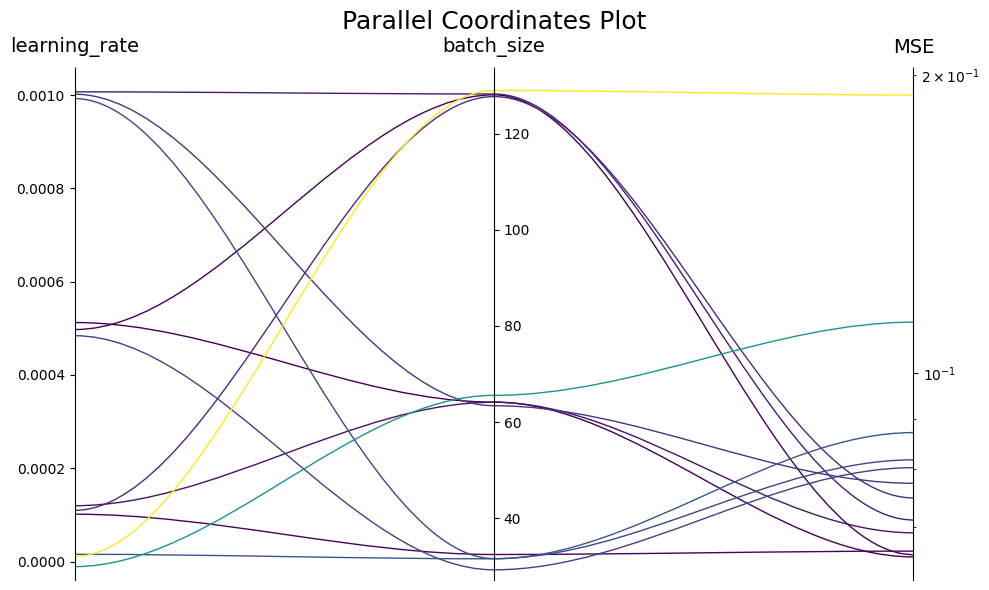

In [17]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 0.7], ["learning_rate", "batch_size", "MSE"])

(12, 3)


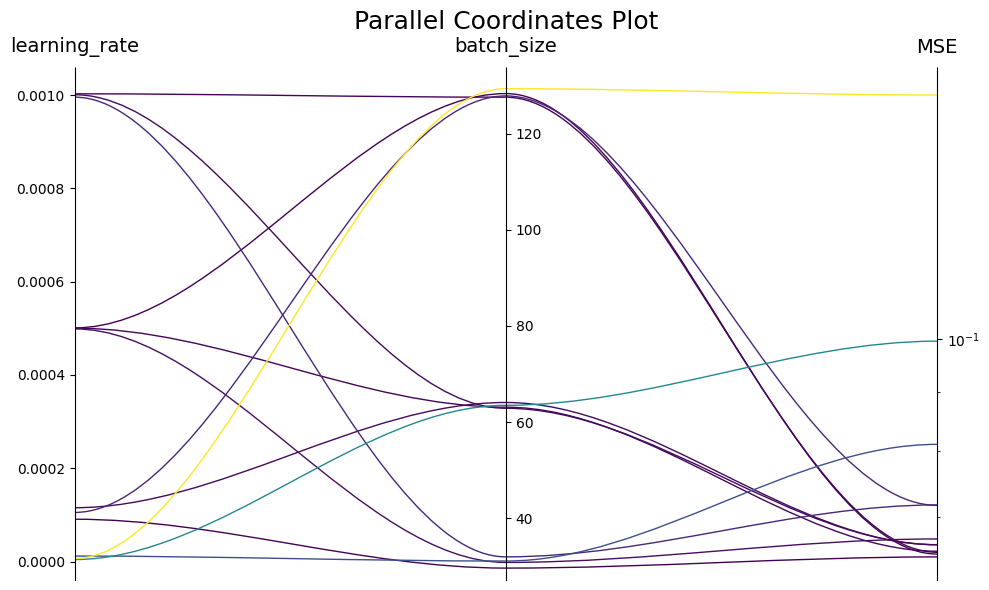

(9, 3)


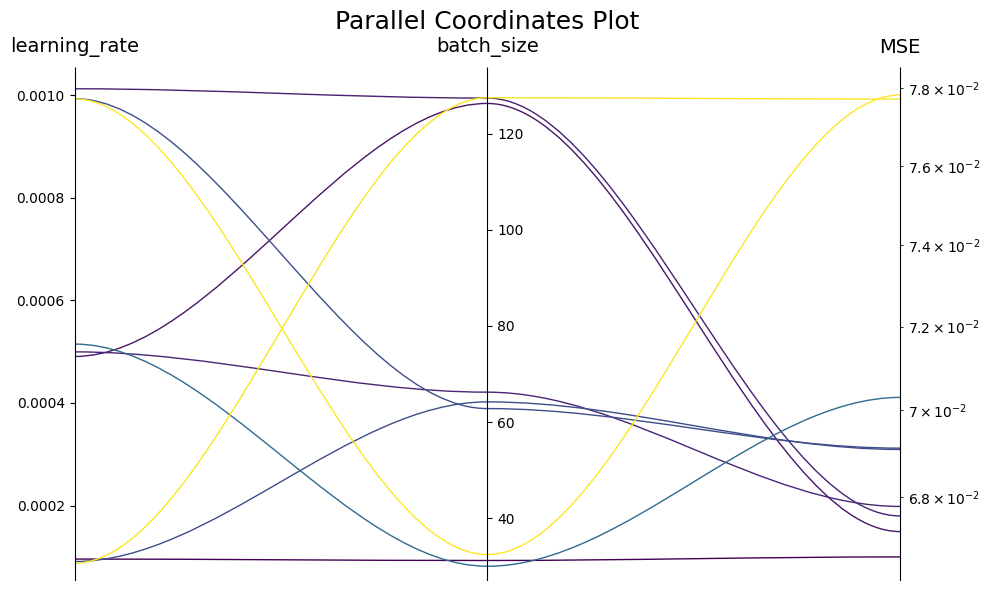

In [18]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 1.6], ["learning_rate", "batch_size", "MSE"], threshold = 0.08)

(12, 3)


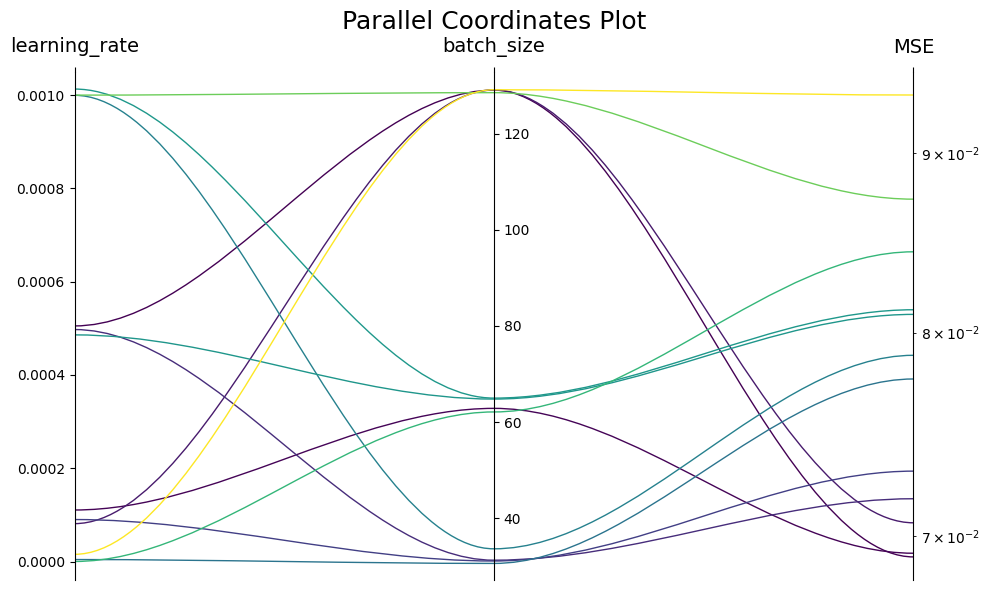

(7, 3)


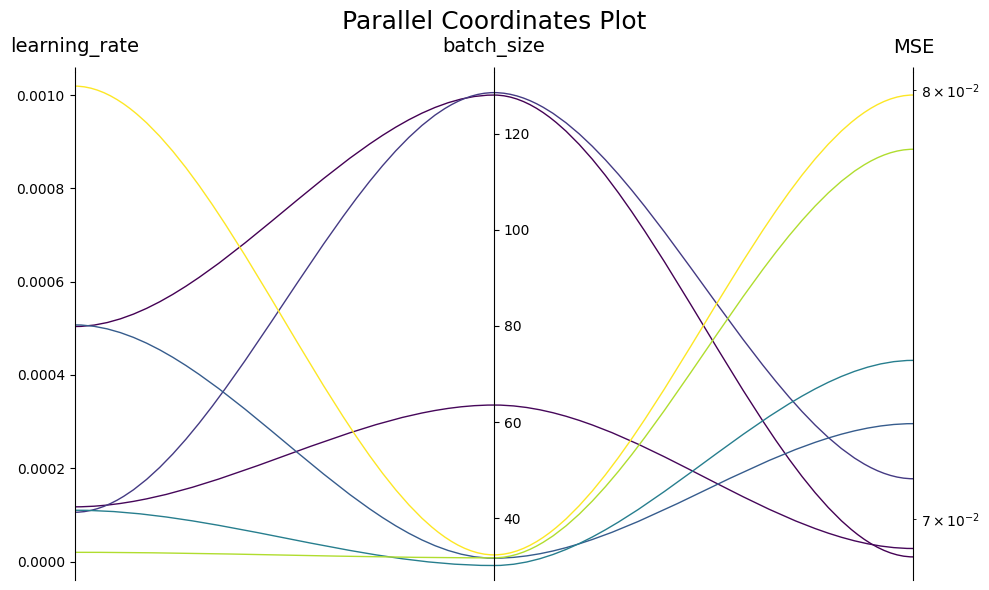

In [19]:
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"])
parallel_coordinates(reduced_hpo_table[reduced_hpo_table["Params[Mio.]"] == 10.5], ["learning_rate", "batch_size", "MSE"], threshold=0.08)